<a href="https://colab.research.google.com/github/Lashi0812/AppiledAI/blob/master/ch16%20NeuralNetwork/Mathematical.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from tensorflow.keras.datasets import mnist
import matplotlib.pyplot as plt
from tensorflow import keras
from tensorflow.keras import layers
import numpy as np


In [ ]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

In [ ]:
x_train.shape

(60000, 28, 28)

In [ ]:
x_train[0].shape

(28, 28)

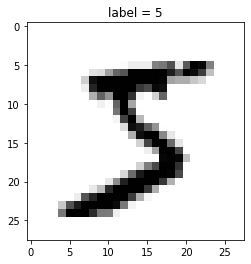

In [ ]:
plt.imshow(x_train[0],cmap=plt.cm.binary)
plt.title(f"label = {y_train[0]}")
plt.show()


In [ ]:
model = keras.Sequential([
    layers.Dense(512,activation="relu"),
    layers.Dense(10,activation="softmax")
])

In [ ]:
model.compile(metrics=["accuracy"],
              loss="sparse_categorical_crossentropy",
              optimizer="rmsprop")

In [ ]:
# preprocess
train_images = x_train.reshape(60000,28*28)
train_images = train_images.astype("float32")/ 255
test_images = x_test.reshape(10000,28*28)
test_images = test_images.astype("float32") /255

In [ ]:
model.fit(train_images,y_train,epochs=5,batch_size=128)

Epoch 1/5
469/469 [==============================] - 5s 10ms/step - loss: 0.0291 - accuracy: 0.9912
Epoch 2/5
469/469 [==============================] - 5s 10ms/step - loss: 0.0219 - accuracy: 0.9931
Epoch 3/5
469/469 [==============================] - 5s 10ms/step - loss: 0.0177 - accuracy: 0.9949
Epoch 4/5
469/469 [==============================] - 5s 10ms/step - loss: 0.0133 - accuracy: 0.9964
Epoch 5/5
469/469 [==============================] - 5s 10ms/step - loss: 0.0101 - accuracy: 0.9967


In [ ]:
test_loss ,test_acc =  model.evaluate(test_images,y_test)
test_loss ,test_acc

313/313 [==============================] - 1s 4ms/step - loss: 0.0759 - accuracy: 0.9801


(0.0759117528796196, 0.9800999760627747)

# Data Representation

Tensor are a generaliztion of matrices to arbiatray number of dimensions.

* scalar = 0d tensor
* vector = 1d tensor
* matrices = 2d tensor

In context of tensor the dimension means `axis`

## Scalar (rank-0 tensor)

In [ ]:
x = np.array(3)
x.shape,x.ndim

((), 0)

## Vector (rank 1 tensor)

In [ ]:
x = np.array([11,2,4,3,4])
x.shape,x.ndim


# dont confuse with the dimension in the 

((5,), 1)

## matrices (rank 2 tensor)

In [ ]:
 x = np.array([[5, 78, 2, 34, 0],
                  [6, 79, 3, 35, 1],
                  [7, 80, 4, 36, 2]])
 x.shape,x.ndim

((3, 5), 2)

In [ ]:
 x = np.array([[[5, 78, 2, 34, 0],
                   [6, 79, 3, 35, 1],
                   [7, 80, 4, 36, 2]],
                  [[5, 78, 2, 34, 0],
                   [6, 79, 3, 35, 1],
                   [7, 80, 4, 36, 2]],
                  [[5, 78, 2, 34, 0],
                   [6, 79, 3, 35, 1],
                   [7, 80, 4, 36, 2]],
              [[5, 78, 2, 34, 0],
                   [6, 79, 3, 35, 1],
                   [7, 80, 4, 36, 2]]])
 x.shape,x.ndim

((4, 3, 5), 3)

In [ ]:
type(train_images)

numpy.ndarray

# Tensor Operation

## Element wise Operation

In [ ]:
def navie_relu(x):
    assert x.ndim == 2

    x =x.copy()
    for i in range(x.shape[0]):
        for j in range(x.shape[1]):
            x[i,j] = max(x[i,j],0)
    return x

In [ ]:
def navie_add(x,y):
    assert x.ndim == 2
    assert x.shape == y.shape

    for i in range(x.shape[0]):
        for j in range(y.shape[1]):
            x[i,j] += y[i,j]
    return x

In [ ]:
import time

x= np.random.random((20,100))
y =np.random.random((20,100))
t0 = time.time() 
for _ in range(1000):
    z = x+y
    z = np.maximum(z,0.)
print(f"Took {time.time()-t0:.2f}")

Took 0.01


In [ ]:
t0 = time.time() 
for _ in range(1000):
    z = navie_add(x,y)
    z = navie_relu(z)
print(f"Took {time.time()-t0:.2f}")

Took 2.60


## Broadcasating

when adding the two tensor with different size,smaller tensor is bradcast to macth the shape of the larger tensor.

Broadcasting consists of two steps:
1. new broadcast axes is added  to smaller tensor to match the ndim of the larger tensor.
2. the smaller tensor is repeated alongside of the new axis

In [ ]:
x = np.random.random((32,10))
y = np.random.random((10,))
x.shape,y.shape

((32, 10), (10,))

In [ ]:
# both have two different shape
# y is smaller tensor, so new dimension is created along the side of axis 0
y = np.expand_dims(y,axis=0)
y.shape

(1, 10)

In [ ]:
y = np.concatenate([y]*32,axis=0)
y.shape

(32, 10)

This is not happening when we add the matrix and vector, but this happening in the algorithm level not in the memory level

In [ ]:
def navie_add_matix_and_vector(x,y):
    assert x.ndim == 2
    assert y.ndim == 1
    assert x.shape[1] == y.shape[0]
    x = x.copy()
    for i in range(x.shape[0]):
        for j in range(x.shape[1]):
            x[i,j] += y[j]
    return x

In [ ]:
try:
    x = np.random.random((64,2,3,5))
    y = np.random.random((2,))
    z = np.maximum(x,y)
    print(z.shape)
except ValueError as ex:
    print(ex)

operands could not be broadcast together with shapes (64,2,3,5) (2,) 


In [ ]:
x = np.random.random((64,2,3,5))
y = np.random.random((5,))
z = np.maximum(x,y)
z.shape

(64, 2, 3, 5)

## Tensor Product

is same as the dot product.

In [ ]:
x = np.random.random((32,))
y = np.random.random((32,))
np.dot(x,y)

8.739196025483599

In [ ]:
def naive_vector_dot(x,y):
    assert x.ndim ==1 
    assert y.ndim ==1
    assert x.shape == y.shape

    z =0.0
    for i in range(x.shape[0]):
        z += x[i]*y[i]
    return z 

In [ ]:
naive_vector_dot(x,y)

8.739196025483599

In [ ]:
x = np.random.random((15,5))
y = np.random.random((5,))
np_z = np.dot(x,y)
np_z

array([1.19550131, 0.62706098, 0.77311557, 1.30736892, 0.99002461,
       1.26427164, 0.44082128, 0.84735293, 1.42457992, 1.07900394,
       1.08866825, 0.37240809, 0.66652085, 0.58518825, 0.83953446])

In [ ]:
def navie_matrix_vector_dot(x,y):
    assert x.ndim ==2
    assert y.ndim ==1
    assert x.shape[1] == y.shape[0]

    z = np.zeros(shape=x.shape[0])
    for i in range(x.shape[0]):
        for j in range(x.shape[1]):
            z[i] += x[i,j] * y[j]
    return z

In [ ]:
navie_matrix_vector_dot(x,y)

array([1.19550131, 0.62706098, 0.77311557, 1.30736892, 0.99002461,
       1.26427164, 0.44082128, 0.84735293, 1.42457992, 1.07900394,
       1.08866825, 0.37240809, 0.66652085, 0.58518825, 0.83953446])

In [ ]:
def navie_matrix_vector_dot(x,y):
    assert x.ndim ==2
    assert y.ndim ==1
    assert x.shape[1] == y.shape[0]

    z = np.zeros(x.shape[0])
    for i in range(x.shape[0]):
        z[i] = naive_vector_dot(x[i,:],y)
    return z

In [ ]:
navie_matrix_vector_dot(x,y)

array([1.19550131, 0.62706098, 0.77311557, 1.30736892, 0.99002461,
       1.26427164, 0.44082128, 0.84735293, 1.42457992, 1.07900394,
       1.08866825, 0.37240809, 0.66652085, 0.58518825, 0.83953446])

In [ ]:
x = np.random.random((3,2))
y = np.random.random((2,3))
np.dot(x,y) == x@y

array([[ True,  True,  True],
       [ True,  True,  True],
       [ True,  True,  True]])

In [ ]:
np.dot(x,y)

array([[0.49332982, 0.35095126, 1.07127578],
       [0.40954736, 0.29457708, 0.74983346],
       [0.2422446 , 0.17658729, 0.34209673]])

In [ ]:
def navie_matrix_dot(x,y):
    assert x.ndim ==2
    assert y.ndim ==2
    assert x.shape[1] == y.shape[0]

    z = np.zeros((x.shape[0],y.shape[1]))
    for i in range(x.shape[0]):
        for j in range(y.shape[1]):
            row_x = x[i,:]
            col_y = y[:,j]
            z[i,j] = naive_vector_dot(row_x,col_y)
    return z

In [ ]:
navie_matrix_dot(x,y)

array([[0.49332982, 0.35095126, 1.07127578],
       [0.40954736, 0.29457708, 0.74983346],
       [0.2422446 , 0.17658729, 0.34209673]])

## Geometric Interpectation of tensor operation

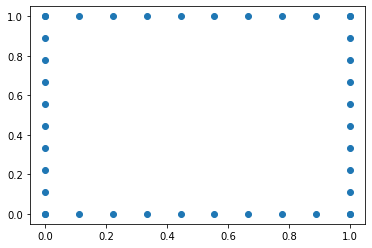

In [ ]:
square = np.r_[np.array(list(zip(np.linspace(0,1,10),np.full(shape=(10,),fill_value=0)))),
               np.array(list(zip(np.full(shape=(10,),fill_value=1),np.linspace(0,1,10)))),
               np.array(list(zip(np.full(shape=(10,),fill_value=0),np.linspace(0,1,10)))),
               np.array(list(zip(np.linspace(0,1,10),np.full(shape=(10,),fill_value=1)))),
               ]
plt.scatter(square[:,0],square[:,1])

Text(0.5, 1.0, 'Translation')

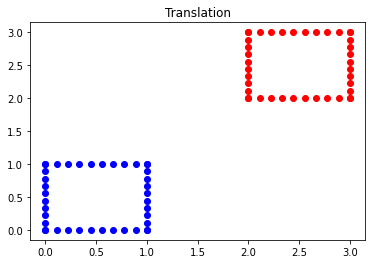

In [ ]:
translation = square + np.array([2,2])
plt.scatter(square[:,0],square[:,1],c='b')
plt.scatter(translation[:,0],translation[:,1],c="r")
plt.title("Translation")

Text(0.5, 1.0, 'Rotation')

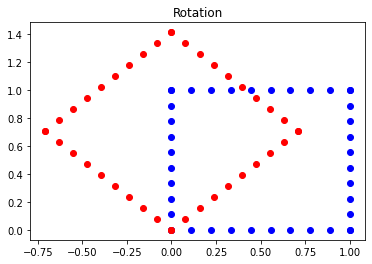

In [ ]:
theta = np.radians(45)
rotation_matrix = np.array([[np.cos(theta),-np.sin(theta)],
                            [np.sin(theta),np.cos(theta)]])
rotation = (rotation_matrix@square.T).T
plt.scatter(square[:,0],square[:,1],c='b')
plt.scatter(rotation[:,0],rotation[:,1],c='r')
plt.title("Rotation")

Text(0.5, 1.0, 'Scaling')

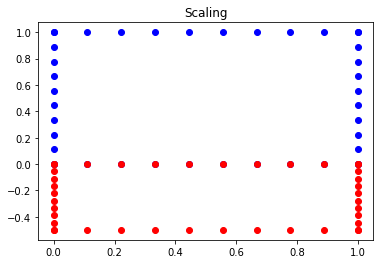

In [ ]:
scaling_matrix = np.array([[1,0],
                           [0,-.5]])
scaling = (scaling_matrix@square.T).T
plt.scatter(square[:,0],square[:,1],c='b')
plt.scatter(scaling[:,0],scaling[:,1],c='r')
plt.title("Scaling")

# Grdient Descent

W and b are tnesor that are attribute of the layer. Thery are called weights or trainabel paramater ot the layer . These weights contain the information learned by the model form th exposure to training data.

These weight are gradually adjust on the feedback signal. These adjement are called trianing/ Learning.

In [9]:
import tensorflow as tf
x = tf.Variable(0.)
with tf.GradientTape() as tape:
    y = 2 * x+3
    print(y)
grad_of_y_wrt_x = tape.gradient(y,x)

tf.Tensor(3.0, shape=(), dtype=float32)


In [2]:
grad_of_y_wrt_x

<tf.Tensor: shape=(), dtype=float32, numpy=2.0>

In [10]:
x = tf.Variable(tf.random.uniform((2,2)))
print(x)
with tf.GradientTape() as tape:
    y = 2 * x +3 
    print(y)
grad_of_y_wrt_x = tape.gradient(y,x)

<tf.Variable 'Variable:0' shape=(2, 2) dtype=float32, numpy=
array([[0.7912705 , 0.68004227],
       [0.00173187, 0.6726295 ]], dtype=float32)>
tf.Tensor(
[[4.582541  4.3600845]
 [3.0034637 4.3452587]], shape=(2, 2), dtype=float32)


In [7]:
grad_of_y_wrt_x

<tf.Tensor: shape=(2, 2), dtype=float32, numpy=
array([[2., 2.],
       [2., 2.]], dtype=float32)>

# Implemention in tensorflow

In [37]:
import tensorflow as tf
import numpy as np

In [107]:
class NaiveDense:
    def __init__(self,input_size,output_size,activation):
        self.activation = activation
        w_shape = (input_size,output_size)
        b_shape = (output_size,)
        w_initial = tf.random.uniform(w_shape,minval=0,maxval=1e-1)
        b_initial = tf.zeros(b_shape)
        self.w = tf.Variable(w_initial)
        self.b = tf.Variable(b_initial)
    
    def __call__(self,inputs):
        return self.activation(tf.matmul(inputs,self.w)+self.b)

    @property
    def weights(self):
        return [self.w,self.b]

In [108]:
class NaiveSequential:
    def __init__(self,layers):
        self.layers = layers
    
    def __call__(self,inputs):
        x = inputs
        for layer in self.layers:
            x = layer(x)
        return x

    @property
    def weights(self):
        weights =[]
        for layer in self.layers:
            weights += layer.weights
        return weights

In [109]:
model = NaiveSequential([
    NaiveDense(input_size=28*28,output_size=512,activation=tf.nn.relu),
    NaiveDense(input_size=512,output_size=10,activation=tf.nn.softmax)
])

In [110]:
len(model.weights)

4

In [111]:
for w in model.weights:
    print(w.shape)

(784, 512)
(512,)
(512, 10)
(10,)


In [112]:
class BatchGenerator:

    def __init__(self,images,labels,batch_size=128):
        assert len(images) == len(labels)
        self.index =0 
        self.images = images
        self.labels = labels
        self.batch_size = batch_size
        self.num_batches = int(np.ceil(len(images)/batch_size))
    
    def next(self):
        images = self.images[self.index:self.index+self.batch_size]
        labels = self.labels[self.index:self.index+self.batch_size]
        self.index += self.batch_size
        return images,labels


In [113]:
def one_training_step(model,images_batch,labels_batch):
    with tf.GradientTape() as tape:
        # feed forward
        predictions = model(images_batch)
        # compute loss per sample
        per_sample_losses = tf.keras.losses.sparse_categorical_crossentropy(
            labels_batch,predictions
        )
        # average the loss
        average_loss = tf.reduce_mean(per_sample_losses)

    gradients = tape.gradient(average_loss,model.weights)
    #upadate weights
    update_weights(gradients,model.weights)
    return average_loss

In [114]:
learning_rate = 1e-3
def update_weights(gradients,weights):
    for g,w in zip(gradients,weights):
        w.assign_sub(g*learning_rate)

In [115]:
# another way to update weights

from tensorflow.keras import optimizers

optimizer = optimizers.SGD(learning_rate=1e-3)
def update_weights(gradients,weights):
    optimizer.apply_gradients(zip(gradients,weights))

In [116]:
def fit(model,images,labels,epochs,batch_size=128):
    for epoch_conunter in range(epochs):
        print(f"Epoch {epoch_conunter}")
        batch_generator = BatchGenerator(images,labels,batch_size)
        for batch_counter in range(batch_generator.num_batches):
            images_batch,labels_batch = batch_generator.next()
            loss = one_training_step(model,images_batch,labels_batch)
            if batch_counter%100 == 0:
                print(f"loss at batch {batch_counter} : {loss:.2f}")

In [117]:
from tensorflow.keras.datasets import mnist

(train_images,train_labels),(test_images,test_labels) = mnist.load_data()

train_images.shape,train_labels.shape,test_images.shape,test_labels.shape

((60000, 28, 28), (60000,), (10000, 28, 28), (10000,))

In [118]:
# convert to grey scale
train_images = train_images.reshape((60000,28*28))
train_images = train_images.astype("float32") /255
test_images = test_images.reshape((10000,28*28))
test_images = test_images.astype("float32")/255

In [119]:
fit(model,train_images,train_labels,epochs=10,batch_size=128)

Epoch 0
loss at batch 0 : 4.86
loss at batch 100 : 2.24
loss at batch 200 : 2.20
loss at batch 300 : 2.08
loss at batch 400 : 2.25
Epoch 1
loss at batch 0 : 1.93
loss at batch 100 : 1.89
loss at batch 200 : 1.83
loss at batch 300 : 1.71
loss at batch 400 : 1.86
Epoch 2
loss at batch 0 : 1.61
loss at batch 100 : 1.59
loss at batch 200 : 1.51
loss at batch 300 : 1.43
loss at batch 400 : 1.54
Epoch 3
loss at batch 0 : 1.35
loss at batch 100 : 1.35
loss at batch 200 : 1.25
loss at batch 300 : 1.21
loss at batch 400 : 1.30
Epoch 4
loss at batch 0 : 1.15
loss at batch 100 : 1.17
loss at batch 200 : 1.05
loss at batch 300 : 1.04
loss at batch 400 : 1.13
Epoch 5
loss at batch 0 : 1.00
loss at batch 100 : 1.03
loss at batch 200 : 0.91
loss at batch 300 : 0.92
loss at batch 400 : 1.00
Epoch 6
loss at batch 0 : 0.89
loss at batch 100 : 0.92
loss at batch 200 : 0.80
loss at batch 300 : 0.83
loss at batch 400 : 0.91
Epoch 7
loss at batch 0 : 0.81
loss at batch 100 : 0.83
loss at batch 200 : 0.72
lo

In [123]:
predictions = model(test_images)
predictions = predictions.numpy()
predicted_labels = np.argmax(predictions,axis=1)
matches = predicted_labels == test_labels
print(f"accuracy : {matches.mean() :.2f}")

accuracy : 0.82
